# Soal 2
## Crime.csv
### Header

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import datetime
import warnings; warnings.simplefilter('ignore')

### Membaca data

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
crime = pd.read_csv('crime.csv', encoding = "ISO-8859-1", low_memory=False, parse_dates=['OCCURRED_ON_DATE'], date_parser=dateparse)
crime

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182080058          2403               Disorderly Conduct   
1           I182080053          3201                    Property Lost   
2           I182080052          2647                            Other   
3           I182080051           413               Aggravated Assault   
4           I182080050          3122                         Aircraft   
5           I182080049          1402                        Vandalism   
6           I182080048          3803  Motor Vehicle Accident Response   
7           I182080047          3301                  Verbal Disputes   
8           I182080045           802                   Simple Assault   
9           I182080044          3410                            Towed   
10          I182080043          3803  Motor Vehicle Accident Response   
11          I182080042           706                       Auto Theft   
12          I182080041          3006               Medical Assistance   
13          I182080040          3115               Investigate Person   
14          I182080039          3006               Medical Assistance   
15          I182080038          3831  Motor Vehicle Accident Response   
16          I182080037          2647                            Other   
17          I182080035          2647                            Other   
18          I182080034          3115               Investigate Person   
19          I182080031          3108             Fire Related Reports   
20          I182080030          3831  Motor Vehicle Accident Response   
21          I182080029           613                          Larceny   
22          I182080028          3114             Investigate Property   
23          I182080027          3301                  Verbal Disputes   
24          I182080027           619                          Larceny   
25          I182080026          2629                       Harassment   
26          I182080025           311                          Robbery   
27          I182080024          1842                   Drug Violation   
28          I182080023          3115               Investigate Person   
29          I182080022          3006               Medical Assistance   
...                ...           ...                              ...   
327790   I110551302-00          3125                  Warrant Arrests   
327791   I110551302-00           623                          Larceny   
327792   I110372326-00           403               Aggravated Assault   
327793   I110372326-00          3125                  Warrant Arrests   
327794   I110261417-00          3125                  Warrant Arrests   
327795   I110261417-00           619                          Larceny   
327796   I110177502-00          3125                  Warrant Arrests   
327797   I110177502-00           802                   Simple Assault   
327798   I110177502-00          3125                  Warrant Arrests   
327799   I100636670-00           629                          Larceny   
327800   I100636670-00          3125                  Warrant Arrests   
327801   I100340225-00          3125                  Warrant Arrests   
327802   I100340225-00           339                          Robbery   
327803   I100222105-02          3125                  Warrant Arrests   
327804   I100033064-00          2907                       Violations   
327805   I100033064-00          2910                       Violations   
327806   I090321958-00          3125                  Warrant Arrests   
327807   I090321958-00          3125                  Warrant Arrests   
327808   I090317057-00           403               Aggravated Assault   
327809   I090317057-00          3125                  Warrant Arrests   
327810   I080542626-00          3125                  Warrant Arrests   
327811   I080542626-00          1848                   Drug Violation   
327812   I080542626-00          1849                   Drug Viola

### Deskripsi data
#### Deskripsi data numerik

In [3]:
crime.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

### Deskripsi data menurut Offense Code secara lengkap

In [4]:
def mode(x):
    return x.value_counts().index[0]
crime['OFFENSE_CODE'].value_counts().agg({'Crime' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Crime  min       1.000000e+00
       max       1.936000e+04
       mean      1.476667e+03
       mode      1.000000e+00
       median    2.545000e+02
       var       1.062509e+07
       std       3.259615e+03
       skew      3.507739e+00
       kurt      1.310382e+01
Name: OFFENSE_CODE, dtype: float64

### Deskripsi data menurut Offense Code secara boxplot

In [5]:
crime['OFFENSE_CODE'].value_counts().plot(kind = 'box')

### Deskripsi data menurut Offense Code secara histogram

In [6]:
crime['OFFENSE_CODE'].value_counts().plot(kind = 'bar')

### Deskripsi data menurut Tanggal

In [7]:
def mode(x):
    return x.value_counts().index[0]
crime['OCCURRED_ON_DATE'].astype('int64').groupby(crime['OFFENSE_CODE']).agg({'Tanggal' :['min', 'max', 'mean', mode, 'median']}).astype('datetime64[ns]')

Tanggal                      \
                             min                 max   
OFFENSE_CODE                                           
111          2015-07-02 16:30:00 2018-09-27 20:48:00   
112          2016-02-12 10:25:00 2016-02-12 10:25:00   
121          2016-01-12 16:40:00 2017-12-22 04:49:00   
123          2016-04-17 01:15:00 2017-06-13 18:59:00   
301          2015-06-16 01:57:00 2018-10-02 16:57:00   
311          2015-06-17 15:40:00 2018-10-03 19:05:00   
315          2015-08-11 08:45:00 2015-08-11 08:45:00   
334          2015-07-17 09:23:00 2015-07-17 09:23:00   
335          2018-07-17 01:00:00 2018-07-17 01:00:00   
338          2016-02-09 13:55:00 2016-02-09 13:55:00   
339          2015-07-27 10:47:00 2017-02-07 02:00:00   
349          2015-08-25 20:45:00 2015-08-25 20:45:00   
351          2015-06-19 07:21:00 2018-09-08 09:50:00   
361          2015-06-19 07:21:00 2018-10-01 19:43:00   
371          2015-06-27 00:08:00 2018-09-06 12:33:00   
381          2015-06-17 22:33:00 2018-10-02 00:00:00   
402          2016-01-24 01:45:00 2016-01-24 01:45:00   
403          2015-10-02 21:00:00 2016-10-29 08:25:00   
404          2016-10-29 08:25:00 2016-10-29 08:25:00   
413          2015-06-15 02:00:00 2018-10-03 20:00:00   
423          2015-06-15 07:45:00 2018-10-03 09:15:00   
432          2015-08-05 14:16:00 2015-08-05 14:16:00   
511          2015-08-10 19:13:00 2015-08-10 19:13:00   
520          2015-06-15 10:00:00 2018-10-03 11:30:00   
521          2015-06-15 10:00:00 2018-09-26 09:00:00   
522          2015-06-15 09:00:00 2018-10-02 11:09:00   
527          2016-01-12 14:45:00 2016-01-12 14:45:00   
530          2015-07-27 12:00:00 2015-07-27 12:00:00   
540          2015-06-16 01:54:00 2018-09-29 06:30:00   
541          2015-07-06 07:35:00 2018-08-19 03:11:00   
...                          ...                 ...   
3201         2015-06-15 00:00:00 2018-10-03 12:43:00   
3202         2015-06-16 16:00:00 2018-10-01 05:05:00   
3203         2015-07-19 12:00:00 2018-09-16 21:00:00   
3205         2015-06-15 16:30:00 2018-10-01 18:19:00   
3207         2015-06-15 08:20:00 2018-10-03 16:37:00   
3208         2015-06-15 14:20:00 2018-10-03 15:33:00   
3301         2015-06-15 10:21:00 2018-10-03 19:32:00   
3302         2015-07-16 06:52:00 2018-06-09 14:36:00   
3303         2015-08-08 01:02:56 2018-09-09 00:32:00   
3304         2015-06-18 01:23:00 2018-09-30 22:00:00   
3305         2015-06-16 16:45:00 2018-09-28 12:27:00   
3402         2015-06-15 20:30:00 2018-09-16 17:35:00   
3403         2015-12-31 08:13:00 2018-09-05 23:00:00   
3410         2015-06-15 01:15:00 2018-10-03 20:00:00   
3501         2015-06-15 16:51:00 2018-10-03 14:20:00   
3502         2015-06-15 12:15:00 2018-10-02 19:50:00   
3503         2015-06-15 19:33:00 2018-10-02 15:14:00   
3620         2015-06-23 18:00:00 2018-09-18 16:47:00   
3625         2015-06-22 01:44:00 2018-09-30 05:00:00   
3801         2015-06-15 07:31:00 2018-10-03 15:34:00   
3802         2015-06-15 12:10:00 2018-10-03 14:12:00   
3803         2015-06-15 07:10:00 2018-10-03 20:16:00   
3805         2015-06-16 15:00:00 2018-10-03 11:50:00   
3807         2015-06-15 09:05:00 2018-10-02 09:24:00   
3810         2015-06-21 17:45:00 2018-10-02 18:30:00   
3811         2015-06-20 13:00:00 2018-10-02 18:23:00   
3820         2015-06-18 07:17:00 2018-10-03 15:51:00   
3821         2015-06-18 07:30:00 2018-09-30 17:20:00   
3830         2015-06-17 00:47:00 2018-10-02 23:16:00   
3831         2015-06-15 11:10:00 2018-10-03 19:30:00   

                                                                \
                                      mean                mode   
OFFENSE_CODE                                                     
111          2017-02-27 19:40:55.636363264 2015-11-26 02:00:00   
112          2016-02-12 10:25:00.000000000 2016-02-12 10:25:00   
121          2016-11-23 03:05:40.000000000 2016-01-12 16:40:00   
123          2016-11-14 10:07:00.000000000 2

### Deskripsi data menurut Latitude & Longtitude

In [8]:
crime.agg({'Lat' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt'], 'Long' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

Lat        Long
min      -1.000000  -71.178674
max      42.395042   -1.000000
mean     42.212995  -70.906030
mode     42.348624  -71.082776
median   42.325552  -71.077493
var       4.724085   12.361074
std       2.173496    3.515832
skew    -19.827352   19.831624
kurt    391.211516  391.324226

### Deskripsi data menurut Latitude & Longtitude secara histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001911EA354A8>,
      dtype=object)

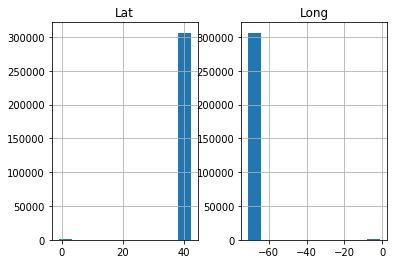

In [9]:
crime.hist(column=['Lat','Long'])

### Deskripsi data menurut Latitude & Longtitude secara Boxplot

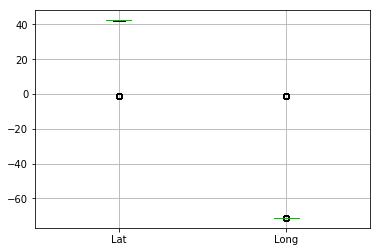

In [10]:
crime.boxplot(column=['Lat','Long'])

### Deskripsi data menurut Tahun

In [11]:
crime.agg({'YEAR' :['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurt']})

YEAR
min     2015.000000
max     2018.000000
mean    2016.598676
mode    2017.000000
median  2017.000000
var        1.019645
std        1.009775
skew      -0.083805
kurt      -1.090411

### Deskripsi data menurut Tahun secara Histogram

In [12]:
crime.YEAR.value_counts().plot(kind = 'bar')

### Deskripsi data menurut Tahun secara Boxplot

In [13]:
crime.YEAR.value_counts().plot(kind = 'box')

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi binomial. Distribusi ini dipilih karena walau data memiliki banyak faktor yang harus diteliti, hasil yang diminta hanya bersifat benar atau salah.

### Jawaban pertanyaan 2-a-i
#### Ekspektasi jumlah Homicide jika diambil 1000 data
#### Mencari jumlah Homicide, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [14]:
Category = crime['OFFENSE_CODE_GROUP']
count_row = crime.shape[0]
CatHom = Category[Category == 'Homicide'].count()
probability = ((CatHom / count_row * 1000).round(0)).astype(np.int64)
probability

1

### Jawaban pertanyaan 2-a-ii
#### Ekspektasi jumlah Homicide tanpa shooting jika diambil 1000 data
#### Mencari jumlah Homicide tanpa shooting, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [15]:
CatHomNS = crime['OFFENSE_CODE_GROUP'].loc[(crime['OFFENSE_CODE_GROUP'] == 'Homicide') & (crime['SHOOTING'] != 'Y')].count()
probability = ((CatHomNS / count_row * 1000).round(0)).astype(np.int64)
probability

0

### Jawaban pertanyaan 2-a-iii
#### Ekspektasi jumlah kejahatan yang terjadi jam 20:00 dan di hari sabtu jika diambil 1000 data
#### Mencari jumlah kejahatan yang terjadi jam 20:00 dan di hari sabtu, lalu bagi dengan total data dan kalikan dengan 1000. Lalu bulatkan hasilnya

In [16]:
Hour = crime['HOUR'].loc[(crime['HOUR'] == 20) & (crime['DAY_OF_WEEK'] == 'Saturday')].count()
probability = ((Hour / count_row * 1000).round(0)).astype(np.int64)
probability

7

### Jawaban pertanyaan 2-b-i
#### Ekspektasi jumlah kejahatan yang terjadi di Geneva Ave atau Prescott Street jika diambil 2000 data
#### Mencari jumlah kejahatan yang terjadi di Geneva Ave atau Prescott Street, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [17]:
Place = crime['STREET'].loc[(crime['STREET'] == 'GENEVA AVE') | (crime['STREET'] == 'PRESCOTT ST')].count()
probability = ((Place / count_row * 2000).round(0)).astype(np.int64)
probability

11

### Jawaban pertanyaan 2-b-ii
#### Ekspektasi jumlah kejahatan yang dilaporkan di Kantor Polisi nomor 495 dan distrik E18 jika diambil 2000 data
#### Mencari jumlah kejahatan yang dilaporkan di Kantor Polisi nomor 495 dan distrik E18, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [18]:
District = crime['DISTRICT'].loc[(crime['DISTRICT'] == 'E18') | (crime['REPORTING_AREA'] == 495)].count()
probability = ((District / count_row * 2000).round(0)).astype(np.int64)
probability

109

### Jawaban pertanyaan 2-b-iii
#### Ekspektasi jumlah kejahatan yang tidak terjadi di Hari Libur jika diambil 2000 data
#### Mencari jumlah kejahatan yang tidak terjadi di Hari Libur, lalu bagi dengan total data dan kalikan dengan 2000. Lalu bulatkan hasilnya

In [19]:
Weekday = crime['DAY_OF_WEEK'].loc[(crime['DAY_OF_WEEK'] != 'Saturday') & (crime['DAY_OF_WEEK'] != 'Sunday')].count()
probability = ((Weekday / count_row * 2000).round(0)).astype(np.int64)
probability

1467